# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
import math
import logging, sys
logging.disable(sys.maxsize)

warnings.filterwarnings("ignore")


Importing plotly failed. Interactive plots will not work.


# Import Datasets

In [2]:
avocados = pd.read_csv('https://drive.google.com/uc?export=download&id=1T-RHLskMhjwuKVZY1CA0lwp0-VqtnOoL') 

In [4]:
avocados.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
avocados.drop(['Unnamed: 0', '4046', '4225', '4770', 'type'], axis = 1, inplace = True)


# EDA

In [7]:
avocados.head()

Date  AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0  2015-12-27          1.33      64236.62     8696.87     8603.62       93.25   
1  2015-12-20          1.35      54876.98     9505.56     9408.07       97.49   
2  2015-12-13          0.93     118220.22     8145.35     8042.21      103.14   
3  2015-12-06          1.08      78992.15     5811.16     5677.40      133.76   
4  2015-11-29          1.28      51039.60     6183.95     5986.26      197.69   

   XLarge Bags  year  region  
0          0.0  2015  Albany  
1          0.0  2015  Albany  
2          0.0  2015  Albany  
3          0.0  2015  Albany  
4          0.0  2015  Albany

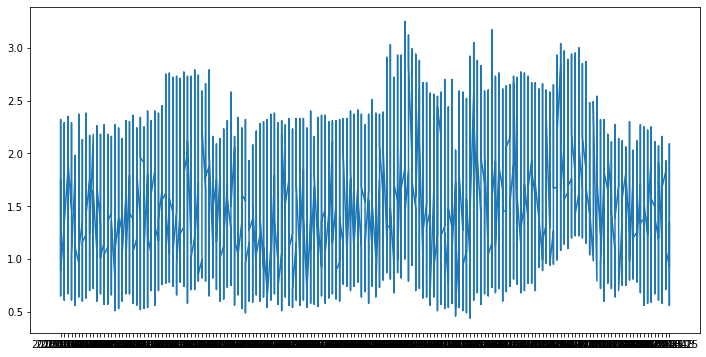

In [8]:
plt.figure(figsize=(12,6))
plt.plot(avocados.sort_values('Date')['Date'], avocados.sort_values('Date')['AveragePrice'])


<AxesSubplot:xlabel='year', ylabel='count'>

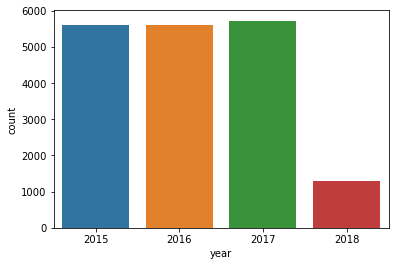

In [9]:
sns.countplot(x='year', data = avocados)

In [10]:
avocados['Date'] = pd.to_datetime(avocados['Date'], format = '%Y-%m-%d')
avocados.index = pd.DatetimeIndex(avocados['Date'])


Text(0, 0.5, 'Mean Price')

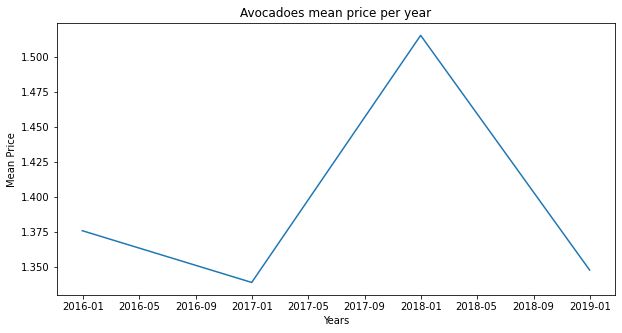

In [11]:
plt.figure(figsize=(10,5))
plt.plot(avocados[['AveragePrice']].resample('Y').mean())
plt.title('Avocadoes mean price per year')
plt.xlabel('Years')
plt.ylabel('Mean Price')


In [12]:
avocados_sample = avocados.drop(['Total Volume', 'region', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'], axis=1)


In [13]:
avocados_sample.columns = ['ds', 'y']

# Fit the model and predict the future

In [14]:
p_model = Prophet()
p_model.fit(avocados_sample)


In [15]:
future_predict = p_model.make_future_dataframe(periods = 365)
forecast = p_model.predict(future_predict)

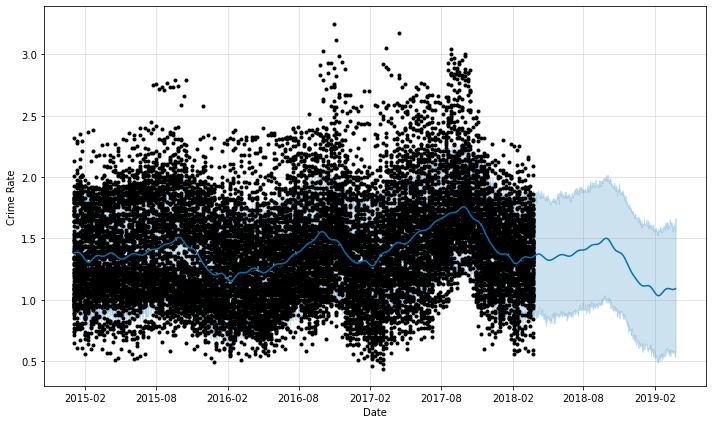

In [16]:
figure = p_model.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')


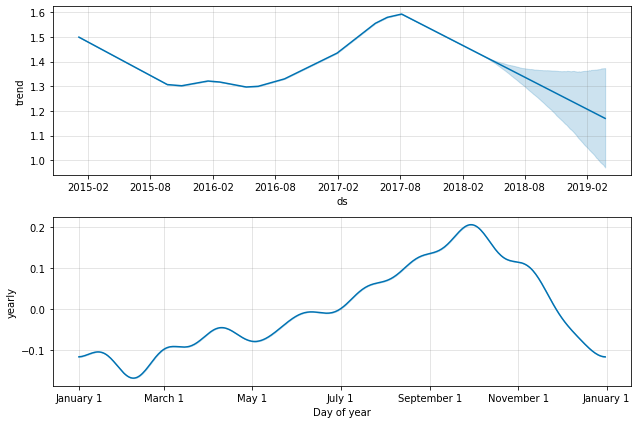

In [17]:
figure = p_model.plot_components(forecast)

# Predict the Price for Region Level

In [18]:
regions = avocados['region'].unique()
regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

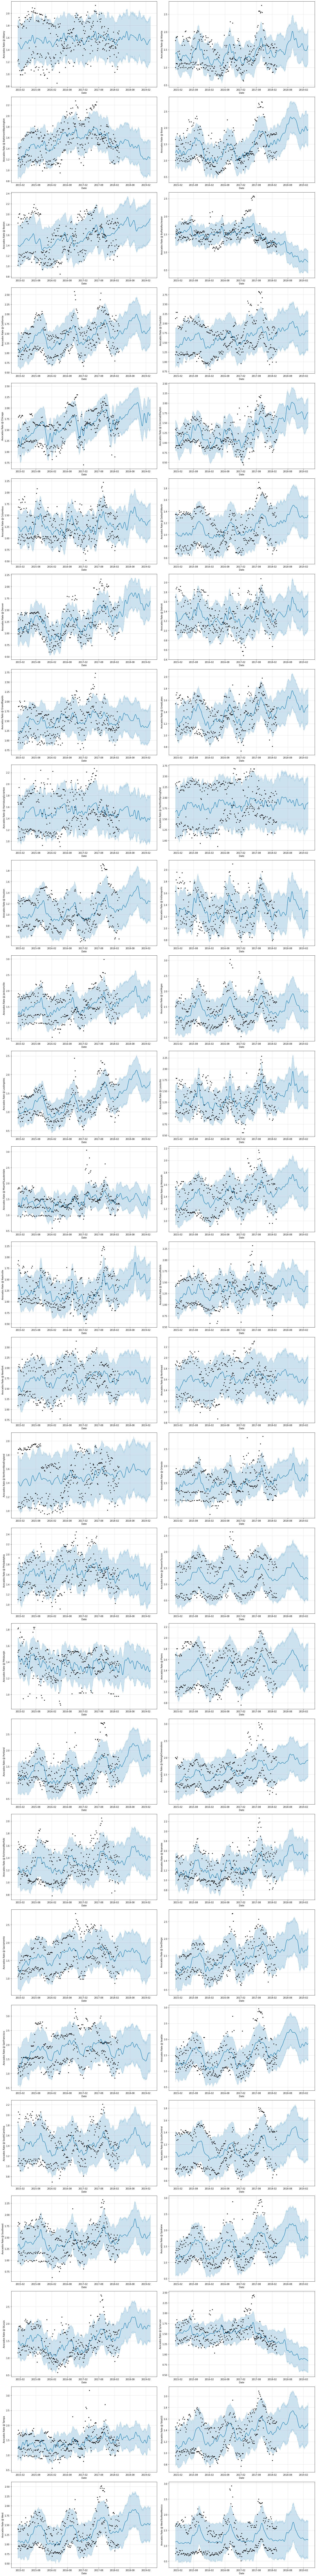

In [19]:
f, ax = plt.subplots(math.floor(len(regions)/2), 2, figsize = (20, 6*(math.floor(len(regions)/2))))

for i, region in enumerate(regions):
    avocados_resampled = avocados[avocados['region'] == region]
    avocados_resampled.head(5)
    avocados_resampled = avocados_resampled.drop(['Total Volume', 'region', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'], axis=1)
    avocados_resampled.columns = ['ds', 'y']
    
    p_model = Prophet()
    p_model.fit(avocados_resampled)
    
    future_predict = p_model.make_future_dataframe(periods = 365)
    forecast = p_model.predict(future_predict)
        
    if(i % 2 == 0):
        figure = p_model.plot(forecast, ax = ax[math.floor(i/2), 0], xlabel = 'Date', ylabel = 'Avocados Rate @ ' + region, figsize = (8,4))
    else:
        figure = p_model.plot(forecast, ax = ax[math.floor(i/2), 1], xlabel = 'Date', ylabel = 'Avocados Rate @ ' + region, figsize = (8,4))        



### Region level predictions using fbProphet